### Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import Huber
import tensorflow as tf

### Loading Dataset

In [2]:
ipl = pd.read_csv('ipl_data.csv')
ipl.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [31]:
ipl.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [3]:
df = ipl.drop(['date','runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'], axis =1)

In [4]:
df.columns

Index(['venue', 'bat_team', 'bowl_team', 'batsman', 'bowler', 'total'], dtype='object')

In [5]:
X = df.drop(['total'], axis =1)
y = df['total']

In [6]:
# Create a LabelEncoder object for each categorical feature
encoder = LabelEncoder()

In [7]:
# Fit and transform the categorical features with label encoding
X['venue'] = encoder.fit_transform(X['venue'])
X['bat_team'] = encoder.fit_transform(X['bat_team'])
X['bowl_team'] = encoder.fit_transform(X['bowl_team'])
X['batsman'] = encoder.fit_transform(X['batsman'])
X['bowler'] = encoder.fit_transform(X['bowler'])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30,shuffle=True)


In [9]:
scaler = MinMaxScaler()

In [10]:
# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
model = Sequential(
    [
    Dense(1024, activation='relu',input_shape = (X_train_scaled.shape[1],)),  # Hidden layer with 512 units and ReLU activation
    Dense(1024, activation='relu'),  # Hidden layer with 216 units and ReLU activation
    Dense(1, activation='linear')  # Output layer with linear activation for regression
    ]
)

In [41]:
huber_loss = Huber(delta=1.0)

In [44]:
model.compile(optimizer='adam', loss=huber_loss)  # Use Huber loss for regression

In [ ]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=5, batch_size=10, validation_data=(X_test_scaled, y_test))

Epoch 1/50
5321/5321 [==============================] - 44s 8ms/step - loss: 13.9580 - val_loss: 13.5377
Epoch 2/50
5321/5321 [==============================] - 41s 8ms/step - loss: 13.8640 - val_loss: 13.7473
Epoch 3/50
5321/5321 [==============================] - 41s 8ms/step - loss: 13.7532 - val_loss: 13.5730
Epoch 4/50
5321/5321 [==============================] - 42s 8ms/step - loss: 13.6623 - val_loss: 13.4476
Epoch 5/50
5321/5321 [==============================] - 42s 8ms/step - loss: 13.5662 - val_loss: 13.2869
Epoch 6/50
5321/5321 [==============================] - 42s 8ms/step - loss: 13.4806 - val_loss: 13.9950
Epoch 7/50
5321/5321 [==============================] - 41s 8ms/step - loss: 13.3974 - val_loss: 13.2576
Epoch 8/50
5321/5321 [==============================] - 42s 8ms/step - loss: 13.3154 - val_loss: 12.9072
Epoch 9/50
5321/5321 [==============================] - 42s 8ms/step - loss: 13.2092 - val_loss: 13.4237
Epoch 10/50
5321/5321 [==============================] 

<Axes: >

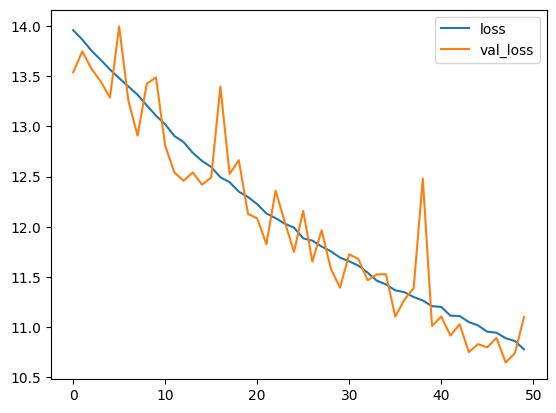

In [49]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

In [50]:
# Make predictions
predictions = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)

11.583850976015178

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings("ignore")

venue = widgets.Dropdown(options=df['venue'].unique().tolist(),description='Select Venue:')
batting_team = widgets.Dropdown(options =df['bat_team'].unique().tolist(),  description='Select Batting Team:')
bowling_team = widgets.Dropdown(options=df['bowl_team'].unique().tolist(),  description='Select Batting Team:')
striker = widgets.Dropdown(options=df['batsman'].unique().tolist(), description='Select Striker:')
bowler = widgets.Dropdown(options=df['bowler'].unique().tolist(), description='Select Bowler:')

predict_button = widgets.Button(description="Predict Score")

def predict_score(b):
    with output:
        clear_output()  # Clear the previous output
        

        # Decode the encoded values back to their original values
        decoded_venue = venue_encoder.transform([venue.value])
        decoded_batting_team = batting_team_encoder.transform([batting_team.value])
        decoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
        decoded_striker = striker_encoder.transform([striker.value])
        decoded_bowler = bowler_encoder.transform([bowler.value])


        input = np.array([decoded_venue,  decoded_batting_team, decoded_bowling_team,decoded_striker, decoded_bowler])
        input = input.reshape(1,5)
        input = scaler.transform(input)
        #print(input)
        predicted_score = model.predict(input)
        predicted_score = int(predicted_score[0,0])

        print(predicted_score)


In [ ]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)


In [ ]:
model.save('ipl_score_predicter.h5')

df['venue'].unique().tolist()
df['bat_team'].unique().tolist()
df['bowl_team'].unique().tolist()
df['batsman'].unique().tolist()
df['bowler'].unique().tolist()

In [52]:
!pip install ipywidgets

   ---------------------------------------- 0.0/139.4 kB ? eta -:--:--
   ----------- --------------------------- 41.0/139.4 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------- 139.4/139.4 kB 1.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/214.4 kB ? eta -:--:--
   -------------------------------------- - 204.8/214.4 kB 6.3 MB/s eta 0:00:01
   ---------------------------------------- 214.4/214.4 kB 4.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.3 MB 8.6 MB/s eta 0:00:01
   ----------- ---------------------------- 0.7/2.3 MB 8.7 MB/s eta 0:00:01
   --------------- ------------------------ 0.9/2.3 MB 7.4 MB/s eta 0:00:01
   ---------------------- ----------------- 1.3/2.3 MB 7.7 MB/s eta 0:00:01
   ---------------------------- ----------- 1.7/2.3 MB 8.2 MB/s eta 0:00:01
   ------------------------------------ --- 2.1/2.3 MB 8.4 MB/s eta 0:00:01
   ----------

In [11]:
import joblib
joblib.dump(scaler,'Scaler.joblib')

['Scaler.joblib']